**Downloading Packages**

In [1]:
!pip install dask
!pip install graphviz

**Multi-Processing**

In [2]:
# importing the multiprocessing module 
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


118
Square: 100
121
Cube: 1000
Done!


In [3]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [4]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 5.23 ms, sys: 2.39 ms, total: 7.61 ms
Wall time: 3 s


**Data Visualisation**

In [5]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


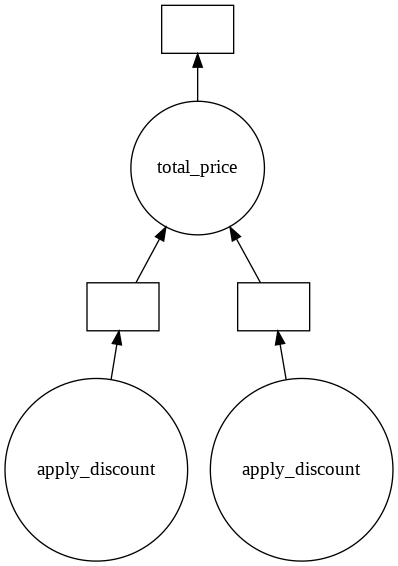

In [6]:
z.visualize()

In [7]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

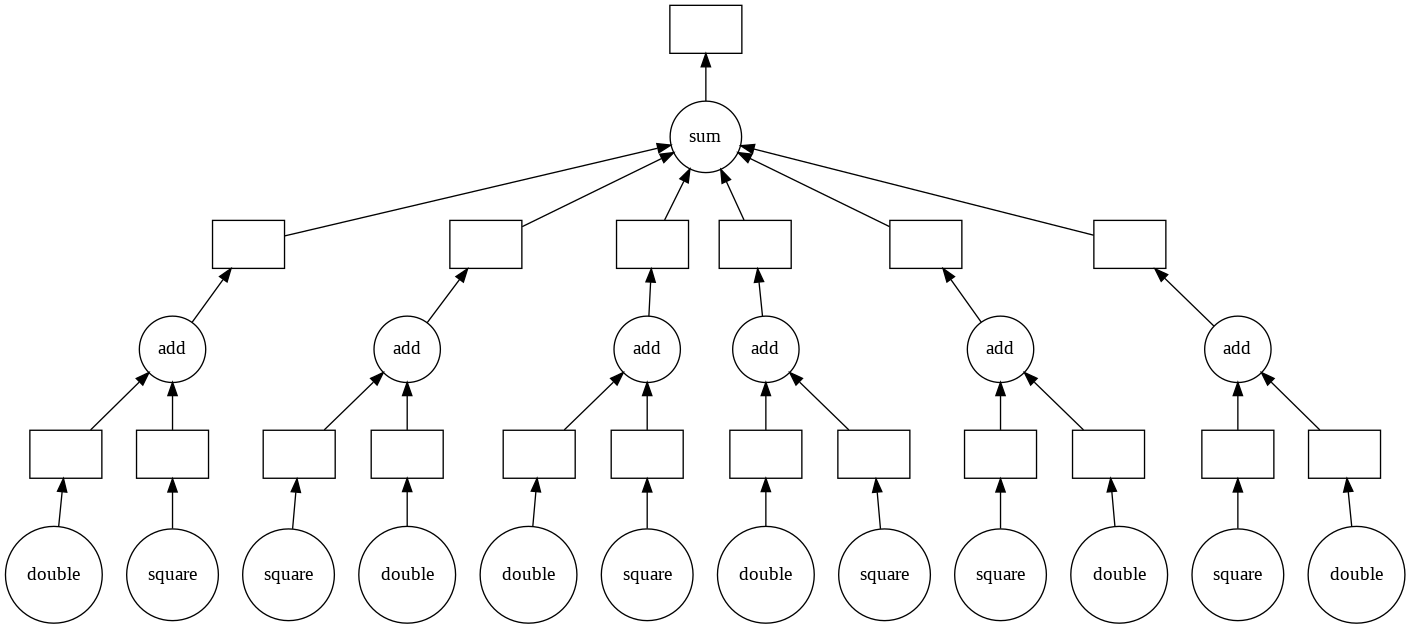

In [8]:
total = delayed(sum)(output)
total.visualize()

In [9]:
import concurrent

In [10]:
import multiprocessing
multiprocessing.cpu_count()

2

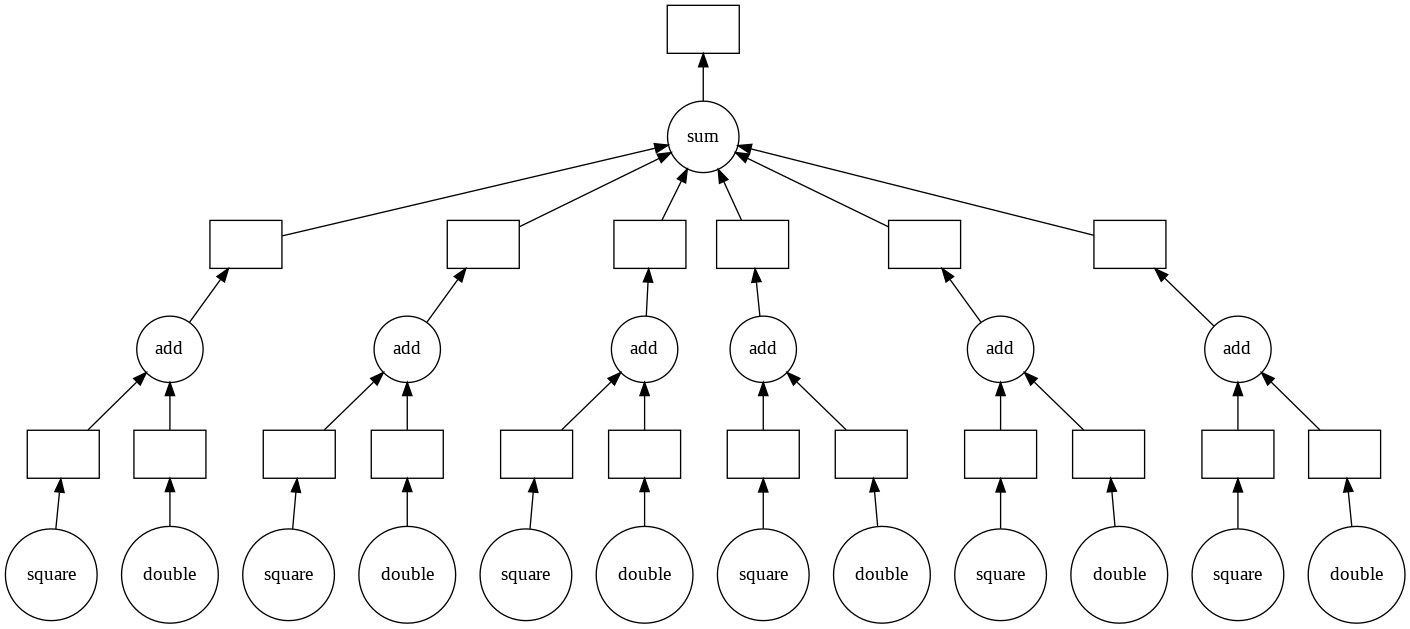

In [11]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [12]:
import dask.dataframe as dd

ImportError: ignored

In [ ]:
dask.__version__

**Loading Already Available Data**

In [ ]:
df = dask.datasets.timeseries()

In [ ]:
df

In [ ]:
df.head()

**Group By Functions and Computations Of Dask**

In [ ]:
df1 = df.groupby('name').y.std()

In [ ]:
df1

In [ ]:
df1.compute()

In [ ]:
df1.visualize()

In [ ]:
%time
df.loc['2000-01-01']

In [ ]:
df = df.persist()

In [ ]:
%time
df.loc['2000-01-01'].compute()

In [ ]:
dask_bag = dask.bag.from_sequence(['I', 'am', 'learning', 'dask'], partition_size = 2)

dask_bag.visualize() #--->[0] [1]

**Visualizing With Dask Dataframe**

In [ ]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [ ]:
len(df)

In [ ]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [ ]:
client = Client(processes = False)

In [ ]:
client

In [ ]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

In [ ]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [ ]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

In [ ]:
results

In [ ]:
import dask

In [ ]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

In [ ]:
results[0]

In [ ]:
%time dask.compute(*results)